<a href="https://colab.research.google.com/github/RobertoR21/XalDigital/blob/main/XalDigiytal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar librerias


In [141]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import datetime as dt

##Coneccion al enlace

In [9]:
api = 'https://api.stackexchange.com/2.2/search?order=desc&sort=activity&intitle=perl&site=stackoverflow'
data = requests.get(api)
if data.status_code == 200:
  print('Coneccion exitosa')
else:
  print('Fallo en coneccion')

Coneccion exitosa


##Convertimos a DataFrame


In [ ]:
json_data = data.json()
items = json_data['items']
df = pd.DataFrame(items)
df

In [32]:
owners_list = df['owner'].tolist()
owner_df = pd.DataFrame(owners_list)
filter_owner_df = owner_df[['display_name', 'reputation', 'link']]

In [105]:
df_filtered = df[['tags', 'title','is_answered','view_count', 'creation_date', 'last_activity_date', 'link']]

In [ ]:
sample_df = pd.concat([df_filtered, filter_owner_df], axis = 1)
sample_df

##Correccion de fechas

In [114]:
timestamp = sample_df['creation_date']
values = []

for ts in timestamp:
    values.append(dt.datetime.fromtimestamp(int(ts)).date())

In [116]:
sample_df['creation_date'] = values

In [117]:
timestamp = sample_df['last_activity_date']
values = []

for ts in timestamp:
    values.append(dt.datetime.fromtimestamp(int(ts)).date())

In [118]:
sample_df['last_activity_date'] = values

In [ ]:
sample_df

##Respuestas contestadas y no contestadas

In [106]:
df_respuestas = df['is_answered'].value_counts()
df_respuestas

True     23
False     7
Name: is_answered, dtype: int64

**Esto nos muestra que tenemos 23 preguntas contestadas y 7 no contestadas**

In [98]:
df_respuestas = df['is_answered'].value_counts()
df_respuestas = pd.DataFrame(df_respuestas)
y = df_respuestas.index.tolist()

In [ ]:
x_label_df = df_respuestas.set_index('is_answered', inplace = True)
x = df_respuestas.index.tolist()

Con esta grafica podemos ver en porcentajes las preguntas que tienen respuesta y las que no tienen respuesta

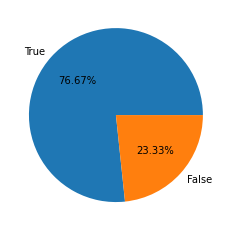

In [84]:
fig, ax = plt.subplots()
ax.pie(x, labels = y,  autopct='%1.2f%%')
plt.show()

##Respuesta con menor numero de vistas

In [111]:
min_views = sample_df['view_count'].min()
df_min_view = sample_df[sample_df['view_count'] == min_views]
df_min_view

,tags,title,is_answered,view_count,creation_date,last_activity_date,link,display_name,reputation,link
2,"[api, perl, mikrotik]",Does anyone know how to enable mikrotik router...,False,28,1651791013,1651857121,https://stackoverflow.com/questions/72134387/d...,cherdonp,1.0,https://stackoverflow.com/users/19047480/cherdonp


##Respuesta mas actual y mas vieja

In [124]:
newest = sample_df['creation_date'].min()
df_newest = sample_df[sample_df['creation_date'] == newest]
df_newest

,tags,title,is_answered,view_count,creation_date,last_activity_date,link,display_name,reputation,link
29,"[perl, locale]",How to fix a locale setting warning from Perl,True,655072,2010-03-23,2022-05-02,https://stackoverflow.com/questions/2499794/ho...,xain,12140.0,https://stackoverflow.com/users/253944/xain


In [126]:
oldest = sample_df['creation_date'].max()
df_oldest = sample_df[sample_df['creation_date'] == oldest]
df_oldest

,tags,title,is_answered,view_count,creation_date,last_activity_date,link,display_name,reputation,link
3,"[regex, perl, printf]",Convert Json string literals to utf8 character...,False,33,2022-05-06,2022-05-06,https://stackoverflow.com/questions/72144503/c...,Daniel Brown,1076.0,https://stackoverflow.com/users/994486/daniel-...
4,[perl],what the following syntax means in perl?,True,46,2022-05-06,2022-05-06,https://stackoverflow.com/questions/72135233/w...,maersa123,19.0,https://stackoverflow.com/users/19048393/maers...


##Owner con mayor reputacion


In [130]:
max_rep = sample_df['reputation'].max()
df_reputation = sample_df[sample_df['reputation'] == max_rep]
df_reputation

,tags,title,is_answered,view_count,creation_date,last_activity_date,link,display_name,reputation,link
26,"[python, ruby, perl, bash, shell]","Why are scripting languages (e.g. Perl, Python...",True,65994,2010-09-03,2022-05-02,https://stackoverflow.com/questions/3637668/wh...,Muhammad Alkarouri,22628.0,https://stackoverflow.com/users/336455/muhamma...


In [138]:
df_reputation[['tags', 'title', 'display_name']]

,tags,title,display_name
26,"[python, ruby, perl, bash, shell]","Why are scripting languages (e.g. Perl, Python...",Muhammad Alkarouri


##Datos del 2 al 6

In [140]:
df[1:5]

,tags,owner,is_answered,view_count,closed_date,answer_count,score,last_activity_date,creation_date,last_edit_date,question_id,link,closed_reason,title,content_license,accepted_answer_id,protected_date
1,"[perl, moose, moosex-types]","{'reputation': 11, 'user_id': 18835228, 'user_...",True,45,NaN,1,1,1651860318,1651565646,1.651572e+09,72096513,https://stackoverflow.com/questions/72096513/p...,NaN,Perl Moose Dynamic assign the value to attribu...,CC BY-SA 4.0,NaN,NaN
2,"[api, perl, mikrotik]","{'reputation': 1, 'user_id': 19047480, 'user_t...",False,28,NaN,0,-1,1651857121,1651791013,1.651792e+09,72134387,https://stackoverflow.com/questions/72134387/d...,NaN,Does anyone know how to enable mikrotik router...,CC BY-SA 4.0,NaN,NaN
3,"[regex, perl, printf]","{'reputation': 1076, 'user_id': 994486, 'user_...",False,33,NaN,1,-1,1651855813,1651853428,NaN,72144503,https://stackoverflow.com/questions/72144503/c...,NaN,Convert Json string literals to utf8 character...,CC BY-SA 4.0,NaN,NaN
4,[perl],"{'reputation': 19, 'user_id': 19048393, 'user_...",True,46,NaN,2,2,1651834350,1651800684,NaN,72135233,https://stackoverflow.com/questions/72135233/w...,NaN,what the following syntax means in perl?,CC BY-SA 4.0,NaN,NaN
